<a href="https://colab.research.google.com/github/M4nu3l4rturo/Challenge_Alura_store/blob/main/AluraStoreLatam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("\n" + "="*50)
print("VISUALIZACIÓN DE RESULTADOS CLAVE")
print("="*50)

archivos_tiendas = {
    'Alura Store 1': 'tienda_1 .csv',
    'Alura Store 2': 'tienda_2.csv',
    'Alura Store 3': 'tienda_3.csv',
    'Alura Store 4': 'tienda_4.csv'
}

dataframes = []


VISUALIZACIÓN DE RESULTADOS CLAVE


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

archivos_tiendas = {
    'Alura Store 1': 'tienda_1 .csv',
    'Alura Store 2': 'tienda_2.csv',
    'Alura Store 3': 'tienda_3.csv',
    'Alura Store 4': 'tienda_4.csv'
}

dataframes = []

for nombre_tienda, archivo in archivos_tiendas.items():
    try:
        df_temp = pd.read_csv(archivo)
        df_temp['Tienda'] = nombre_tienda
        dataframes.append(df_temp)
    except FileNotFoundError:
        print(f"Error: El archivo {archivo} no se encontró. Asegúrate de haberlo subido a Colab.")
        # Si un archivo falta, el script continuará con los que sí encontró.

df_combined = pd.concat(dataframes, ignore_index=True)

# 2. Creación de la columna de Facturación Total (Total_Venta)
# El precio final pagado por el cliente es la suma del Precio del producto y el Costo de envío.
df_combined['Total_Venta'] = df_combined['Precio'] + df_combined['Costo de envío']

# 3. Renombrar columnas para el análisis y simplificación
df = df_combined.rename(columns={
    'Categoría del Producto': 'Categoría',
    'Calificación': 'Evaluación',
    'Costo de envío': 'Costo_Envio'
})

print("✅ Datos cargados y consolidados exitosamente en el DataFrame 'df'.")

✅ Datos cargados y consolidados exitosamente en el DataFrame 'df'.


#1. Análisis de facturación



In [35]:
print("\n" + "—"*50)
print("1. FACTURACIÓN TOTAL DE CADA TIENDA")
print("—"*50)

# Agrupar por Tienda y sumar la facturación total
facturacion_por_tienda = df.groupby('Tienda')['Total_Venta'].sum().sort_values(ascending=False).astype(int)

# Almacenar resultados clave para el informe final
tienda_menos_facturacion = facturacion_por_tienda.index[-1]
facturacion_menos_vendida = facturacion_por_tienda.min()
facturacion_mas_vendida = facturacion_por_tienda.max()

# Mostrar el resultado en formato de moneda para fácil lectura
print(facturacion_por_tienda.map('COP {:,.0f}'.format))


——————————————————————————————————————————————————
1. FACTURACIÓN TOTAL DE CADA TIENDA
——————————————————————————————————————————————————
Tienda
Alura Store 1    COP 1,212,258,300
Alura Store 2    COP 1,175,828,600
Alura Store 3    COP 1,156,536,200
Alura Store 4    COP 1,093,693,100
Name: Total_Venta, dtype: object


# 2. Ventas por categoría

In [36]:
print("\n" + "—"*50)
print("2. CATEGORÍAS MÁS POPULARES POR TIENDA (Top 3 por Transacciones)")
print("—"*50)

# Contar la cantidad de transacciones por Tienda y Categoría
categorias_por_tienda = df.groupby(['Tienda', 'Categoría']).size().reset_index(name='Total_Transacciones')

# Función para obtener el Top N de categorías por tienda
def top_n_categorias(grupo, n=3):
    return grupo.sort_values(by='Total_Transacciones', ascending=False).head(n)

# Aplicar la función a cada tienda
categorias_top_3 = categorias_por_tienda.groupby('Tienda').apply(top_n_categorias)

# Mostrar el resultado (limpiando el índice duplicado de 'Tienda')
print(categorias_top_3[['Tienda', 'Categoría', 'Total_Transacciones']].to_string(index=False))


——————————————————————————————————————————————————
2. CATEGORÍAS MÁS POPULARES POR TIENDA (Top 3 por Transacciones)
——————————————————————————————————————————————————
       Tienda    Categoría  Total_Transacciones
Alura Store 1      Muebles                  465
Alura Store 1 Electrónicos                  448
Alura Store 1     Juguetes                  324
Alura Store 2      Muebles                  442
Alura Store 2 Electrónicos                  422
Alura Store 2     Juguetes                  313
Alura Store 3      Muebles                  499
Alura Store 3 Electrónicos                  451
Alura Store 3     Juguetes                  315
Alura Store 4      Muebles                  480
Alura Store 4 Electrónicos                  451
Alura Store 4     Juguetes                  338


/tmp/ipython-input-2766014942.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  categorias_top_3 = categorias_por_tienda.groupby('Tienda').apply(top_n_categorias)


# 3. Calificación promedio de la tienda


In [37]:
print("\n" + "—"*50)
print("3. PROMEDIO DE EVALUACIÓN DE LOS CLIENTES POR TIENDA")
print("—"*50)

# Agrupar por Tienda y calcular el promedio de la 'Evaluación'
evaluacion_promedio = df.groupby('Tienda')['Evaluación'].mean().sort_values(ascending=False).round(2)

# Almacenar resultados clave para el informe final
tienda_peor_evaluada = evaluacion_promedio.index[-1]
evaluacion_minima = evaluacion_promedio.min()
evaluacion_maxima = evaluacion_promedio.max()

print(evaluacion_promedio)


——————————————————————————————————————————————————
3. PROMEDIO DE EVALUACIÓN DE LOS CLIENTES POR TIENDA
——————————————————————————————————————————————————
Tienda
Alura Store 3    4.05
Alura Store 2    4.04
Alura Store 4    4.00
Alura Store 1    3.98
Name: Evaluación, dtype: float64


# 4. Productos más y menos vendidos

In [46]:
print("\n" + "—"*50)
print("4. PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA")
print("—"*50)

# Contar la cantidad de transacciones por Tienda y Producto
ventas_por_producto = df.groupby(['Tienda', 'Producto']).size().reset_index(name='Total_Transacciones')

def productos_extremos(grupo):
    if grupo.empty:
        return pd.DataFrame([{'Tipo': 'N/A', 'Producto': 'N/A', 'Cantidad': 0}])

    # Producto más vendido (máximo de transacciones)
    mas_vendido = grupo.loc[grupo['Total_Transacciones'].idxmax()]

    # Producto menos vendido (mínimo de transacciones)
    menos_vendido = grupo.loc[grupo['Total_Transacciones'].idxmin()]

    return pd.DataFrame([
        {'Tipo': 'Más Vendido', 'Producto': mas_vendido['Producto'], 'Cantidad': mas_vendido['Total_Transacciones']},
        {'Tipo': 'Menos Vendido', 'Producto': menos_vendido['Producto'], 'Cantidad': menos_vendido['Total_Transacciones']}
    ])

# Aplicar la función a cada tienda and reset the index
productos_extremos_por_tienda = ventas_por_producto.groupby('Tienda').apply(productos_extremos).reset_index()

print(productos_extremos_por_tienda.to_string(index=False))


——————————————————————————————————————————————————
4. PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA
——————————————————————————————————————————————————
       Tienda  level_1          Tipo                  Producto  Cantidad
Alura Store 1        0   Más Vendido                   Armario        60
Alura Store 1        1 Menos Vendido Auriculares con micrófono        33
Alura Store 2        0   Más Vendido Iniciando en programación        65
Alura Store 2        1 Menos Vendido             Juego de mesa        32
Alura Store 3        0   Más Vendido             Kit de bancas        57
Alura Store 3        1 Menos Vendido   Bloques de construcción        35
Alura Store 4        0   Más Vendido                  Cama box        62
Alura Store 4        1 Menos Vendido        Guitarra eléctrica        33


/tmp/ipython-input-3789468439.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productos_extremos_por_tienda = ventas_por_producto.groupby('Tienda').apply(productos_extremos).reset_index()


# 5. Envío promedio por tienda

In [39]:
print("\n" + "—"*50)
print("5. COSTO PROMEDIO DEL ENVÍO POR TIENDA")
print("—"*50)

# Agrupar por Tienda y calcular el costo promedio de envío
costo_promedio_envio = df.groupby('Tienda')['Costo_Envio'].mean().sort_values(ascending=False).round(2)

# Almacenar resultados clave para el informe final
tienda_costo_envio_alto = costo_promedio_envio.index[0]
costo_envio_minimo = costo_promedio_envio.min()
costo_envio_maximo = costo_promedio_envio.max()

print(costo_promedio_envio.map('COP {:,.0f}'.format))


——————————————————————————————————————————————————
5. COSTO PROMEDIO DEL ENVÍO POR TIENDA
——————————————————————————————————————————————————
Tienda
Alura Store 1    COP 26,019
Alura Store 2    COP 25,216
Alura Store 3    COP 24,806
Alura Store 4    COP 23,459
Name: Costo_Envio, dtype: object


/tmp/ipython-input-4228727065.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=facturacion_por_tienda.index, y=facturacion_por_tienda.values, palette=colores)


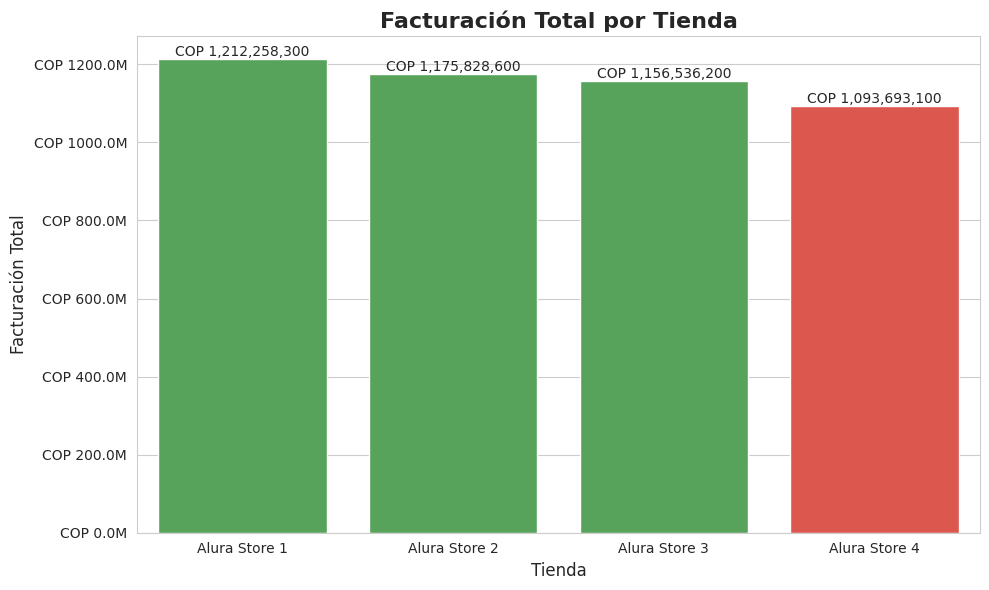


✅ Gráfico generado. La tienda **Alura Store 4** se destaca en rojo por su menor facturación, la cual es la base para la recomendación estratégica.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración básica para el gráfico
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

plt.figure(figsize=(10, 6))

colores = ['#4CAF50' if tienda != tienda_menos_facturacion else '#F44336' for tienda in facturacion_por_tienda.index]
ax = sns.barplot(x=facturacion_por_tienda.index, y=facturacion_por_tienda.values, palette=colores)

# Formato del eje Y a millones de COP (para mejor lectura)
def formato_millones(x, pos):
    return 'COP {:1.1f}M'.format(x / 1e6)

formatter = FuncFormatter(formato_millones)
ax.yaxis.set_major_formatter(formatter)

# Agregar etiquetas de valor en la parte superior de cada barra
for i in ax.containers:
    ax.bar_label(i, fmt='COP {:,.0f}'.format)

plt.title('Facturación Total por Tienda', fontsize=16, weight='bold')
plt.ylabel('Facturación Total', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\n✅ Gráfico generado. La tienda **{tienda_menos_facturacion}** se destaca en rojo por su menor facturación, la cual es la base para la recomendación estratégica.")

**Extra**


In [49]:
from IPython.display import display, Markdown
import pandas as pd

candidata_a_vender = tienda_menos_facturacion
tienda_peor_eval = tienda_peor_evaluada
tienda_mas_cara_envio = tienda_costo_envio_alto

# Extraer valores específicos para la tienda candidata
fact_candidata = facturacion_por_tienda.loc[candidata_a_vender]
eval_candidata = evaluacion_promedio.loc[candidata_a_vender]
costo_candidata = costo_promedio_envio.loc[candidata_a_vender]

# Extraer el producto menos vendido de la tienda candidata
df_temp = productos_extremos_por_tienda[
    (productos_extremos_por_tienda['Tienda'] == candidata_a_vender) &
    (productos_extremos_por_tienda['Tipo'] == 'Menos Vendido')
]
producto_menos_vendido = df_temp['Producto'].iloc[0] if not df_temp.empty else "N/A"


# Extraer la categoría TOP 1 de la tienda candidata
df_cat = categorias_top_3.loc[candidata_a_vender].head(1)
cat_top_1 = df_cat['Categoría'].iloc[0] if not df_cat.empty else "N/A"

def format_currency(value):
    return f"COP {value:,.0f}"

fact_candidata_f = format_currency(fact_candidata)
eval_candidata_f = f"{eval_candidata:.2f}"
costo_candidata_f = format_currency(costo_candidata)

# Crear la tabla de Facturación para el Markdown
tabla_facturacion_md = facturacion_por_tienda.map(format_currency).to_frame(name='Facturación Total')
tabla_facturacion_md['Observación'] = ''
tabla_facturacion_md.loc[candidata_a_vender, 'Observación'] = '**Menor ingreso bruto**'
tabla_facturacion_md = tabla_facturacion_md.to_markdown()

# Definir comentarios de impacto
comentario_eval = "Baja. Indica problemas de calidad o servicio." if candidata_a_vender == tienda_peor_eval else "Aceptable, pero la baja facturación es el problema principal."
comentario_costo = "¡ALTO! Es la más costosa en envíos, lo que reduce el margen de ganancia." if candidata_a_vender == tienda_mas_cara_envio else "El costo es un factor, pero no es el principal problema."

# Se utiliza una f-string multilinea para construir todo el informe
informe_final_md = f"""
INFORME ESTRATÉGICO FINAL PARA EL SEÑOR JUAN


**OBJETIVO:** Evaluación de rendimiento para tomar una decisión fundamental sobre la continuidad de las tiendas.

RECOMENDACIÓN CLAVE

Basado en el análisis consolidado de las cinco métricas, la tienda candidata a ser vendida es: **{candidata_a_vender}**.

 I. Análisis de Facturación (Lucro Principal)

La facturación total es el indicador primario de rendimiento y rentabilidad.

{tabla_facturacion_md}

* **Conclusión:** **{candidata_a_vender}** registró la facturación total más baja con **{fact_candidata_f}**, lo que la posiciona como la menos rentable y la principal candidata para una desinversión estratégica.

### II. Evaluación de Clientes y Eficiencia Operacional

Estas métricas actúan como argumentos de soporte para la decisión final.

| Métrica | Valor de {candidata_a_vender} | Desempeño | Implicación Estratégica |
| :--- | :--- | :--- | :--- |
| **Evaluación Promedio** | **{eval_candidata_f}** | **{comentario_eval}** | Sugiere que el bajo lucro podría estar vinculado a problemas de satisfacción y retención de clientes. |
| **Costo Promedio de Envío** | **{costo_candidata_f}** | **{comentario_costo}** | Un alto costo operativo reduce los márgenes, exacerbando el problema de la baja facturación. |

### III. Análisis de Productos y Categorías

* **Categoría Más Popular:** **{cat_top_1}**. Si bien esta categoría tiene demanda, su volumen de ventas no es suficiente para que la tienda alcance la rentabilidad deseada.
* **Producto Menos Vendido:** **{producto_menos_vendido}**. Este producto debería ser evaluado para su retiro del inventario, liberando capital y espacio.

### IV. Estrategia Final

Se recomienda considerar seriamente la venta de **{candidata_a_vender}**. Esta decisión permitirá reasignar recursos financieros y humanos a las tiendas con mejor rendimiento (**{facturacion_por_tienda.index[0]}**), maximizando el potencial de crecimiento general de Alura Store Latam.

---
"""

# Mostrar el informe en Google Colab con formato Markdown
display(Markdown(informe_final_md))
print("\n✅ ¡Informe estratégico dinámico generado exitosamente!")


INFORME ESTRATÉGICO FINAL PARA EL SEÑOR JUAN


**OBJETIVO:** Evaluación de rendimiento para tomar una decisión fundamental sobre la continuidad de las tiendas.

RECOMENDACIÓN CLAVE

Basado en el análisis consolidado de las cinco métricas, la tienda candidata a ser vendida es: **Alura Store 4**.

 I. Análisis de Facturación (Lucro Principal)

La facturación total es el indicador primario de rendimiento y rentabilidad.

| Tienda        | Facturación Total   | Observación             |
|:--------------|:--------------------|:------------------------|
| Alura Store 1 | COP 1,212,258,300   |                         |
| Alura Store 2 | COP 1,175,828,600   |                         |
| Alura Store 3 | COP 1,156,536,200   |                         |
| Alura Store 4 | COP 1,093,693,100   | **Menor ingreso bruto** |

* **Conclusión:** **Alura Store 4** registró la facturación total más baja con **COP 1,093,693,100**, lo que la posiciona como la menos rentable y la principal candidata para una desinversión estratégica.

### II. Evaluación de Clientes y Eficiencia Operacional

Estas métricas actúan como argumentos de soporte para la decisión final.

| Métrica | Valor de Alura Store 4 | Desempeño | Implicación Estratégica |
| :--- | :--- | :--- | :--- |
| **Evaluación Promedio** | **4.00** | **Aceptable, pero la baja facturación es el problema principal.** | Sugiere que el bajo lucro podría estar vinculado a problemas de satisfacción y retención de clientes. |
| **Costo Promedio de Envío** | **COP 23,459** | **El costo es un factor, pero no es el principal problema.** | Un alto costo operativo reduce los márgenes, exacerbando el problema de la baja facturación. |

### III. Análisis de Productos y Categorías

* **Categoría Más Popular:** **Muebles**. Si bien esta categoría tiene demanda, su volumen de ventas no es suficiente para que la tienda alcance la rentabilidad deseada.
* **Producto Menos Vendido:** **Guitarra eléctrica**. Este producto debería ser evaluado para su retiro del inventario, liberando capital y espacio.

### IV. Estrategia Final

Se recomienda considerar seriamente la venta de **Alura Store 4**. Esta decisión permitirá reasignar recursos financieros y humanos a las tiendas con mejor rendimiento (**Alura Store 1**), maximizando el potencial de crecimiento general de Alura Store Latam.

---



✅ ¡Informe estratégico dinámico generado exitosamente!
